# Model Assumptions 

In the context of statistical modeling, especially in linear regression, model assumptions refer to the set of conditions that the underlying data and model need to satisfy for the results to be valid and reliable. These assumptions are critical because if they are violated, the estimates obtained from the model may be biased, inefficient, or misleading.

Rule of Thumb:

    If the p-value is less than 0.05, you reject the null hypothesis (H₀).
    If the p-value is greater than or equal to 0.05, you fail to reject the null hypothesis.

In [449]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [450]:
# Read data

df_auto = pd.read_csv("./data/auto-mpg.csv")
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [451]:
# Read data 
df_ads = pd.read_csv("./data/advertising.csv",index_col=0)
df_ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [452]:
# def model 

def make_model(X,Y):
    model = sm.OLS(endog=Y ,exog=sm.add_constant(X))
    results = model.fit()
    return results


# 1.Linearity 

    The linearity assumption requires that there is a linear relationship between the response variable (y) and predictor (X). Linear means that the change in y by 1-unit change in X, is constant.



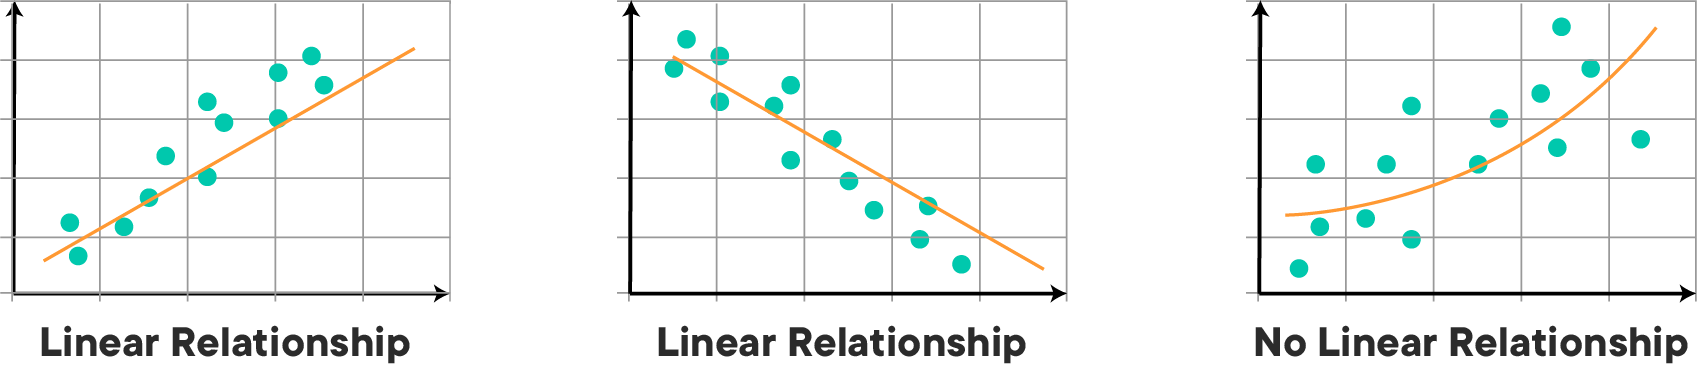

To check for linearity in linear regression, the goal is to determine if the relationship between the independent variables (predictors) and the dependent variable (target) is linear. Here are some common methods to check for linearity

### 1. Scatter Plots

The simplest and most direct method to check for linearity is by visually inspecting scatter plots.
Steps:

    Plot each independent variable (X) against the dependent variable (Y).
    Look for a straight-line pattern in the scatter plot.

In [453]:
# An Example of a Scatter plot 
X = df_ads["newspaper"]
Y = df_ads["sales"]

<Axes: xlabel='newspaper', ylabel='sales'>

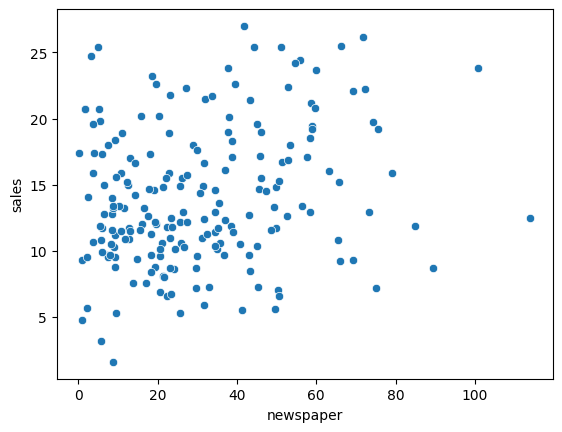

In [454]:
sns.scatterplot(x=X,y=Y)

In [455]:
# pairplots (scatter matrix)
# sns.pairplot(df_ads)

In [456]:
# sns.pairplot(df_auto)

### Statistical Testing for Linearity
#### Rainbow Test

The Rainbow Test is a diagnostic test used to check whether a linear regression model is misspecified — specifically, to determine if there are non-linear relationships between the independent variables and the dependent variable that a linear model might fail to capture

#### Rainbow test  Hypothesis:

***

    The null hypothesis of the Rainbow test is that the linear model is correctly specified (i.e., the relationship between the predictors and the target variable is linear). 
    
    The alternative hypothesis is that the linear model is misspecified, and there is a non-linear relationship between the predictors and the dependent variable
    
*If the p-value from the test is small (typically less than 0.05), you reject the null hypothesis*

In [457]:
from statsmodels.stats.diagnostic import linear_rainbow

# Ranibow test example 
# returns F-statitisc ,p,valu

In [458]:
# build a model
results = make_model(df_auto["horsepower"],df_auto["displacement"])

linear_rainbow(results)

(np.float64(0.8375954747610892), np.float64(0.8916583112705215))

In [459]:
# build a model2
results = make_model(df_auto["horsepower"],df_auto["displacement"])

linear_rainbow(results)

(np.float64(0.8375954747610892), np.float64(0.8916583112705215))

In [460]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1611.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.51e-140
Time:                        15:09:04   Log-Likelihood:                -2058.3
No. Observations:                 392   AIC:                             4121.
Df Residuals:                     390   BIC:                             4128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.4231      6.766     -8.931      0.000     -73.725     -47.121
horsepower     2.4393      0.061     40.134      0.000       2.320       2.559
==============================================================================
Omnibus:                        2.678   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.862
Skew:                           0.025   Prob(JB):                        0.239
Kurtosis:                       3.416   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Independence

The independence assumption has two parts:

independence of features and independence of errors.

### Independence of Features

    Independence of features means that we want to avoid collinearity between features in a multiple regression.

Collinearity means that the features can be used to predict each other, which causes numerical problems for the regression algorithm and leads to unstable coefficient

In [461]:
# How to check  for indipedence of features 
df_ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

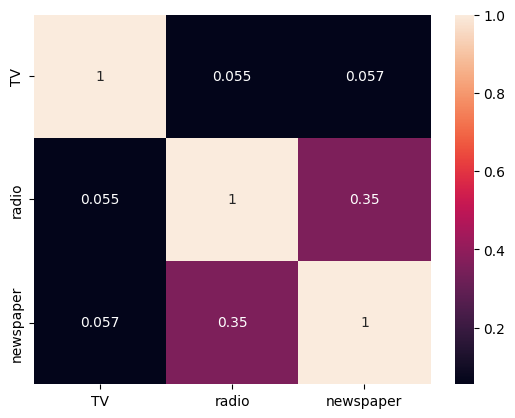

In [462]:
sns.heatmap(df_ads[["TV",'radio',"newspaper"]].corr(),annot=True)

In [463]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: >

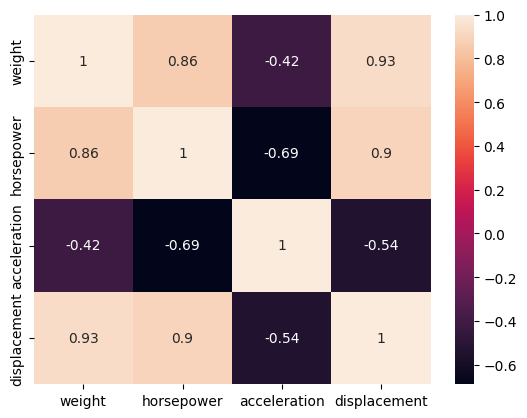

In [464]:
sns.heatmap(df_auto[["weight","horsepower","acceleration","displacement"]].corr(),annot=True)

### Independence of Errors

    Independence of errors means we want to avoid autocorrelation of errors. Autocorrelation means that a variable is correlated with itself, so that later values can be predicted based on previous values.


## 3. Normality

    The normality assumption states that the model residuals should follow a normal distribution


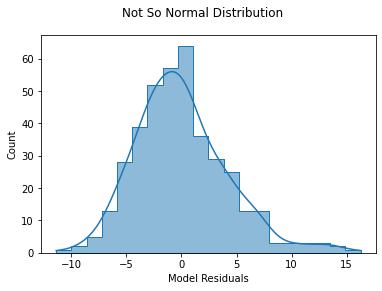

A visual check for normality (above an example of a normal distribution)

<Axes: ylabel='Density'>

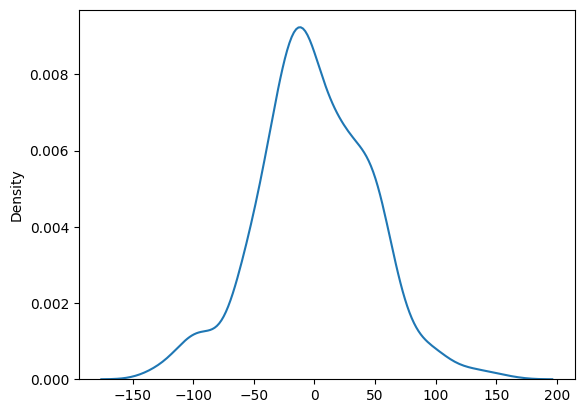

In [465]:
# visual check on the residuals
results = make_model(df_auto["horsepower"],df_auto["displacement"])

sns.kdeplot(results.resid)


### Statistical Test for normality
#### Jarque-Bera Test

The Jarque-Bera (JB) test is a statistical test used to check whether a dataset follows a normal distribution. Specifically, it tests the null hypothesis that the data comes from a normal distribution by examining two key characteristics:

    Skewness: A measure of the asymmetry of the distribution.
    Kurtosis: A measure of the "tailedness" or the sharpness of the peak of the distribution.

Hypotheses:

    Null Hypothesis (H₀): The data follows a normal distribution.
    Alternative Hypothesis (H₁): The data does not follow a normal distribution.

*If the p-value from the test is small (typically less than 0.05 or 0.01), you reject the null hypothesis and conclude that the data significantly deviates from a normal distribution.*

In [466]:

from statsmodels.stats.stattools import jarque_bera
# Values returned are 
    # JB test statistic
    # The p-value for JB
    # Skew
    # Kurtosis

In [467]:
# Example statistical test 
jarque_bera(results.resid)



(np.float64(2.8618205602461733),
 np.float64(0.2390911832053531),
 np.float64(0.02492649906058203),
 np.float64(3.415605801531779))

In [468]:
# print summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1611.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.51e-140
Time:                        15:09:06   Log-Likelihood:                -2058.3
No. Observations:                 392   AIC:                             4121.
Df Residuals:                     390   BIC:                             4128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.4231      6.766     -8.931      0.000     -73.725     -47.121
horsepower     2.4393      0.061     40.134      0.000       2.320       2.559
==============================================================================
Omnibus:                        2.678   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.862
Skew:                           0.025   Prob(JB):                        0.239
Kurtosis:                       3.416   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [469]:
# Other test examples Todo

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import omni_normtest


## 4. Equal Variance: Homoscedasticity

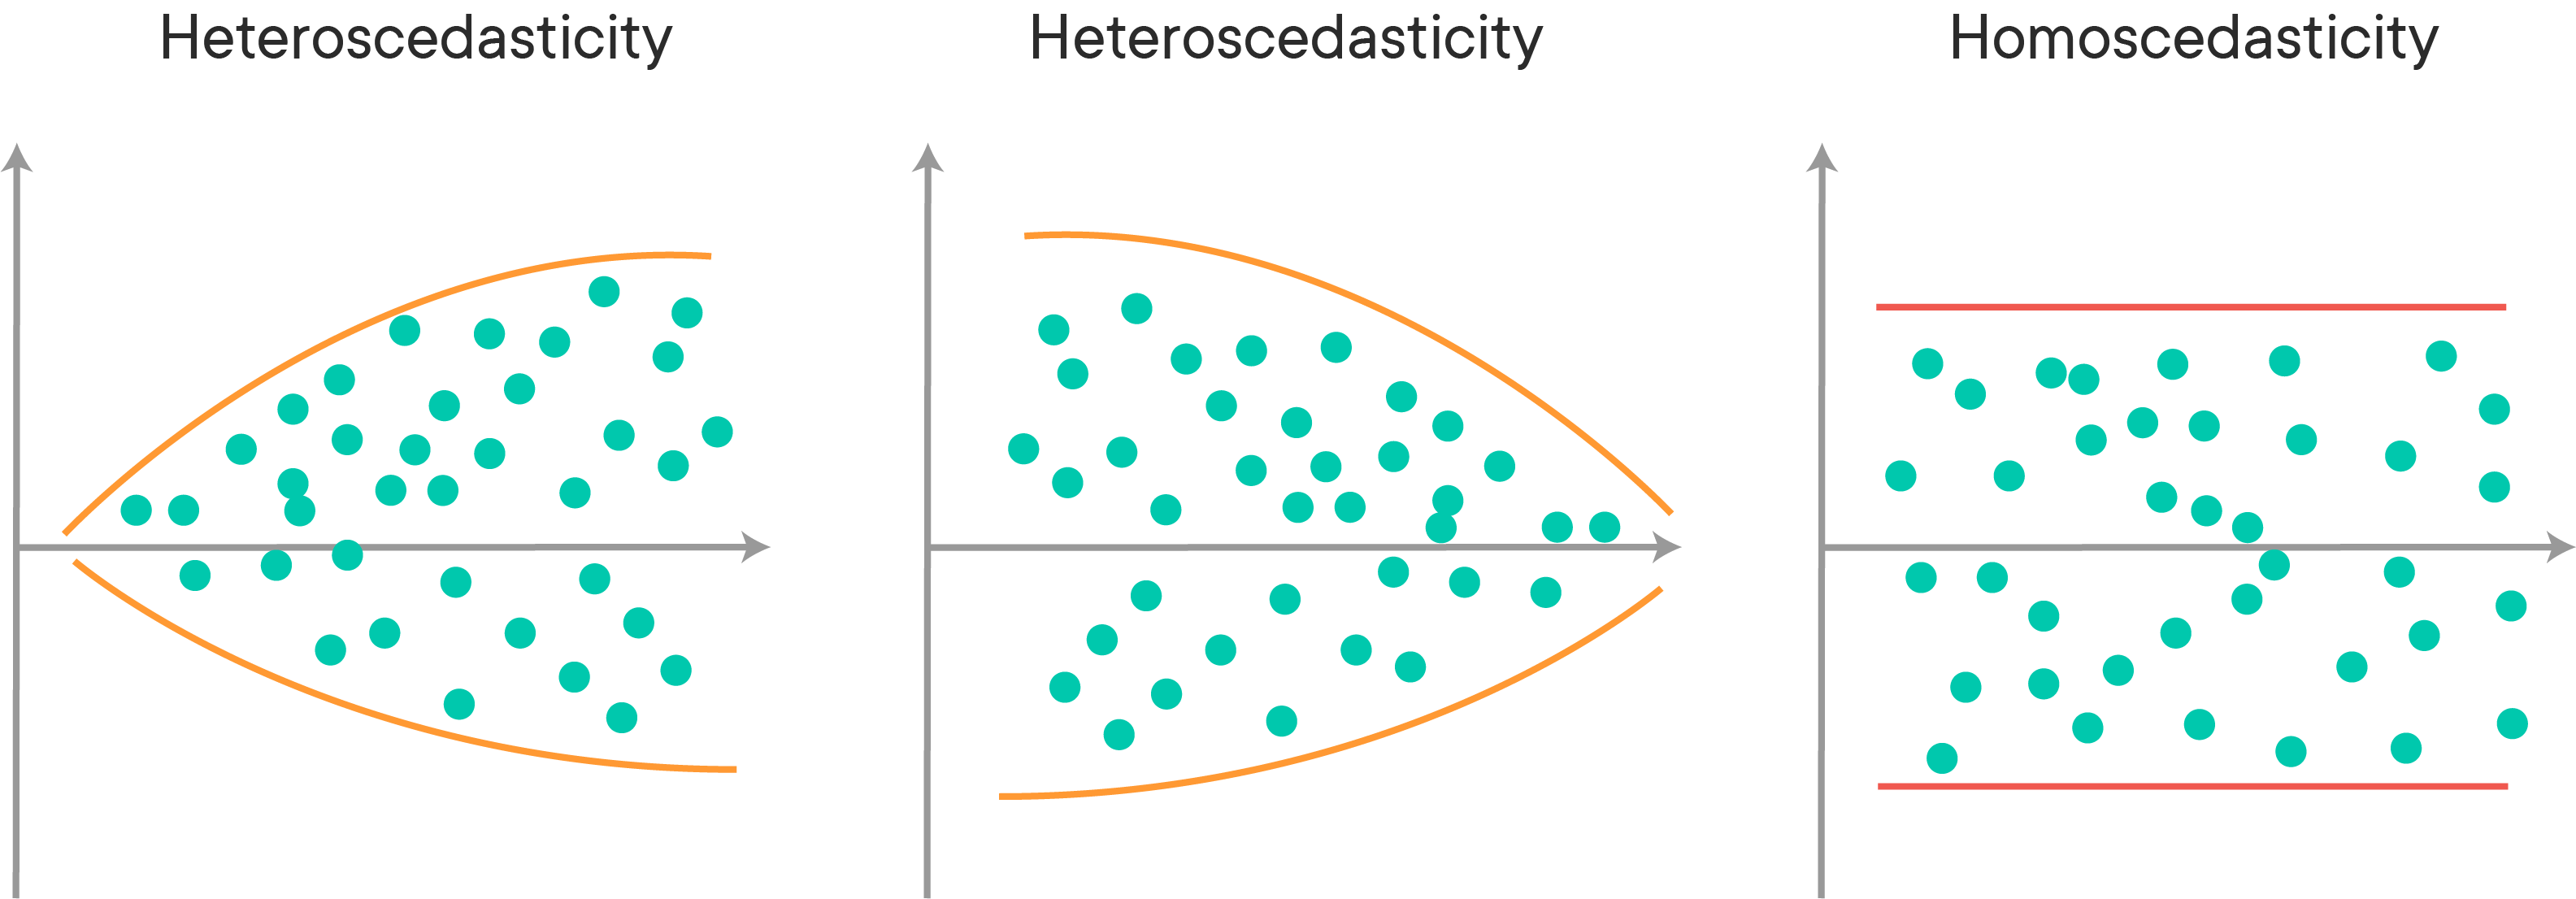

### Statistical test
#### Goldfeld-Quandt test

One popular statistical test for homoscedasticity is the Goldfeld-Quandt test, which divides the dataset into two groups, then finds the MSE of the residuals for each group. The ratio of the second group's mse_resid divided by the first group's mse_resid becomes a statistic that can be compared to the f-distribution to find a p-value.

Null Hypothesis (H₀):

    The variance of the residuals is constant (i.e., the error terms are homoscedastic).
    
Alternative Hypothesis (H₁):

    The variance of the residuals is not constant (i.e., the error terms are heteroscedastic).

*If the p-value from the test is small (typically less than 0.05) reject the null hypothesis*

In [470]:
from statsmodels.stats.diagnostic import het_goldfeldquandt 

In [471]:
# out puts 
# Goldfeld-Quandt test statistic
# Goldfeld-Quandt test p-value
# Ordering

het_goldfeldquandt(df_ads["sales"],sm.add_constant(df_ads["radio"]))


(np.float64(1.1409213847001907), np.float64(0.2576335266276604), 'increasing')

In [472]:
het_goldfeldquandt(df_ads["sales"],sm.add_constant(df_ads["TV"]))

(np.float64(1.2071212974713172), np.float64(0.17652851936962768), 'increasing')

## Other tests
 

Hypotheses for the Breusch-Pagan test:
1. Null Hypothesis (H₀):

    The null hypothesis is that there is no heteroscedasticity in the model, meaning that the variance of the residuals is constant across all levels of the independent variable(s).

    In other words, the error variance is homoscedastic.

    H₀: The residuals have constant variance (homoscedasticity). No heteroscedasticity.

2. Alternative Hypothesis (H₁):

    The alternative hypothesis is that the variance of the residuals depends on the independent variable(s), indicating the presence of heteroscedasticity.

    In other words, the error variance is not constant and varies across different levels of the independent variable(s).

    H₁: The residuals exhibit heteroscedasticity (i.e., the error variance is not constant).

In [473]:
# Todo


from statsmodels.stats.diagnostic import het_breuschpagan

# LM statistic, p-value, f-statistic, f p-value

In [474]:
results = make_model(df_ads["radio"],df_ads["sales"])

het_breuschpagan(resid=results.resid,exog_het=sm.add_constant(df_ads["TV"]))

(np.float64(14.359401675857807),
 np.float64(0.00015102367199860622),
 np.float64(15.315408146096772),
 np.float64(0.00012504869053379125))

## Model Summary (model.summary()) explained

Key Sections in the Output:

### 1. Model Information:

- **Dep. Variable:**

This is the dependent variable (the outcome or target variable you are trying to predict). 

- **Model**

The type of regression model used is OLS (Ordinary Least Squares), which is a standard method for linear regression.

Method: Indicates the method used to fit the model. Least Squares refers to the technique used to estimate the model parameters (coefficients).

- **Date and Time:**

Shows when the regression analysis was performed.

No. Observations: The number of data points (observations) used in the analysis.

### 2. Goodness-of-Fit:

- **R-squared:**

This is the proportion of the variance in the dependent variable (displacement) that is explained by the independent variable (horsepower). A higher R-squared value indicates a better fit of the model. An R-squared of 0.805 suggests that about 80.5% of the variability in our data
- **Adjusted R-squared:** 

This adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure of model fit when there are multiple independent variables. In this case, the adjusted R-squared is the same as the R-squared, indicating a good model fit without too many predictors.

### 3. Model Significance:

- **F-statistic:** 

The F-statistic tests the overall significance of the regression model. It tests whether the independent variables, taken together, are significantly related to the dependent variable. A large F-statistic with a very small p-value suggests that at least one of the predictors is statistically significant.

- **Prob (F-statistic):** 

The p-value associated with the F-statistic. A very small p-value (close to zero) indicates that the model as a whole is statistically significant and explains a significant amount of variance in the dependent variable.

### 4. Coefficients:

- **coef:** 

The coefficients represent the estimated effect of each predictor variable on the dependent variable. 

- **std err:**

This is the standard error of each coefficient, which measures the variability or uncertainty of the coefficient estimate. Smaller standard errors indicate more precise estimates.

- **t:** 

The t-statistic is used to test whether each coefficient is significantly different from zero. It is the ratio of the coefficient estimate to its standard error.

- **P>|t|:** 

The p-value for each coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A small p-value (typically < 0.05) indicates that the predictor is statistically significant. In this case, the predictors (intercept and horsepower) are highly significant, as their p-values are very small.

- **[0.025, 0.975]:** 

This is the 95% confidence interval for each coefficient. It provides a range of values within which the true population parameter is likely to fall with 95% confidence. If the confidence interval does not include zero, the coefficient is considered statistically significant.

### 5. Residual Statistics:

- **Omnibus:** 

This is a test for the normality of the residuals (the differences between the observed and predicted values). A small p-value for the Omnibus test suggests that the residuals deviate significantly from normality.

- **Durbin-Watson:** 

This statistic tests for autocorrelation (correlation between residuals). Values close to 2 suggest no autocorrelation, while values significantly lower than 2 suggest positive autocorrelation (and values above 2 suggest negative autocorrelation).

- **Jarque-Bera (JB):** 

This test also assesses the normality of the residuals. Like the Omnibus test, a small p-value suggests that the residuals are not normally distributed.

- **Skew:**
    
This measures the asymmetry of the residuals. A skew close to zero indicates a symmetric distribution of residuals.

- **Kurtosis:** 

This measures the tailedness of the residuals' distribution. A kurtosis close to 3 suggests a normal distribution, while values higher or lower than 3 indicate either heavy or light tails, respectively.

### 6. Condition Number (Cond. No.):

This is a diagnostic measure that reflects multicollinearity in the model. A high condition number (e.g., >30) suggests potential multicollinearity issues.

In [475]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.35e-19
Time:                        15:09:06   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""